In [1]:
from OneDimOptimization import * 

In [2]:
golden_ratio('x**2+5', search_area = [-10, 10])

{'point': 2.052817948735756e-06,
 'value_func': 5.00000000000421,
 'report': 0,
 'interim_results_dataset': None}

In [3]:
parabola_method('X**2+5', limits='[-10, 10]', figure=False)

(0.0, 5, 'Достигнуто максимальное количество итераций')

In [4]:
def f(x):
    return  x**2+5
def f1(x):
    return  2*x


In [5]:
def F(x):
    return  x**2+5
BrantMethod(F, limits=[-10, 10])

(1.9736532008703576e-16, 5.0, 'Достигнута заданная точность')

In [6]:
bfgs(f, f1, x0=3)

{'point': 0.0, 'value_func': 5.0, 'report': 1, 'interim_results_dataset': None}

In [7]:
def f(x):
    return x**4+x**2+x+1
def f1(x):
    return 4*x**3 + 2*x + 1

In [8]:
golden_ratio('x**4+x**2+x+1', search_area = [-1, 0])

{'point': -0.3854574897423595,
 'value_func': 0.785195253149063,
 'report': 0,
 'interim_results_dataset': None}

C:\Users\ACer\Downloads\optimal_machine_learning-main\HW2\OneDimOptimization.py:241: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(-0.37414500683994534,
 0.785435135664111,
 'Достигнуто максимальное количество итераций')

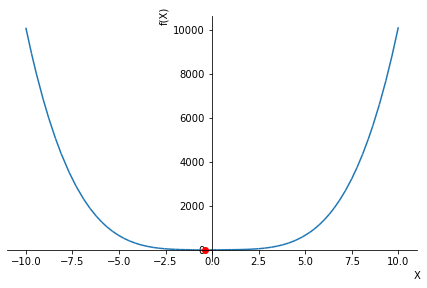

In [9]:
parabola_method('X**4+X**2+X+1', limits='[-1, 0]')

In [10]:
def F(x):
    return x**4+x**2+x+1
BrantMethod(F, limits=[-1, 0])

(-0.38545849851819786, 0.785195253147138, 'Достигнута заданная точность')

In [11]:
bfgs(f, f1, x0=0)

{'point': -0.3854589403088574,
 'value_func': 0.7851952531475073,
 'report': 1,
 'interim_results_dataset': None}

In [12]:
def f(x):
    return np.exp(x)+1/x
def f1(x):
    return np.exp(x) - 1/x**2

In [13]:
golden_ratio('exp(x)+1/x', search_area = [0.5, 1.5])

{'point': 0.7034686122265748,
 'value_func': 3.44227729450047,
 'report': 0,
 'interim_results_dataset': None}

(0.7244359150468127,
 3.44395109505146,
 'Достигнуто максимальное количество итераций')

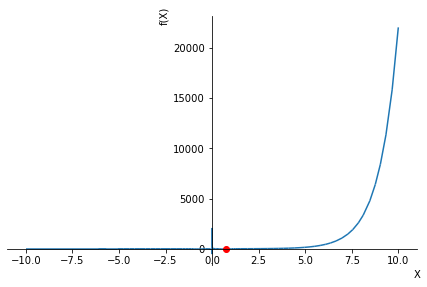

In [14]:
parabola_method('exp(X)+1/X', limits='[0.5, 1.5]')

In [15]:
def F(x):
    return np.exp(x)+1/x
BrantMethod(F, limits=[0.5, 1.5])

(0.7034674218656566, 3.442277294494974, 'Достигнута заданная точность')

In [16]:
bfgs(f, f1, x0=1)

не смогли найти лучшее приближение


E:\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


{'point': 1,
 'value_func': 3.718281828459045,
 'report': 4,
 'interim_results_dataset': None}

In [17]:
def f(x):
    return x**2-2*x+np.exp(-x)
def f1(x):
    return 2*x - 2 - np.exp(-x)

In [18]:
golden_ratio(func='x**2-2*x+exp(-x)', search_area=(-1, 1.5))

{'point': 1.1571848250458614,
 'value_func': -0.660922988059385,
 'report': 0,
 'interim_results_dataset': None}

(1.1574408488928294,
 -0.660922912283779,
 'Достигнуто максимальное количество итераций')

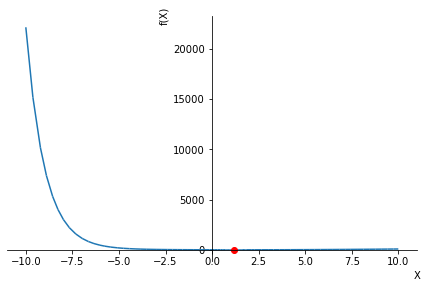

In [19]:
parabola_method('X**2-2*X+exp(-X)', limits='[-1, 1.5]')

In [20]:
def F(x):
    return x**2-2*x+exp(-x)
BrantMethod(F, limits=[-1, 1.5])

(1.15718495355366, -0.660922988059403, 'Достигнута заданная точность')

In [21]:
bfgs(f, f1, x0=1)

{'point': 1.1571849508274354,
 'value_func': -0.660922988059403,
 'report': 1,
 'interim_results_dataset': None}

In [22]:
def f(x):
    return -3*x*np.sin(0.75*x)+np.exp(-2*x)
def f1(x):
    return -2.25*x*np.cos(0.75*x) - 3*np.sin(0.75*x) - 2*np.exp(-2*x)

In [23]:
golden_ratio(func='-3*x*sin(0.75*x)+exp(-2*x)', search_area=(0, 2*np.pi))

{'point': 2.7064759148330357,
 'value_func': -7.27435797007356,
 'report': 0,
 'interim_results_dataset': None}

(2.29642407867976,
 -6.80021461227076,
 'Достигнуто максимальное количество итераций')

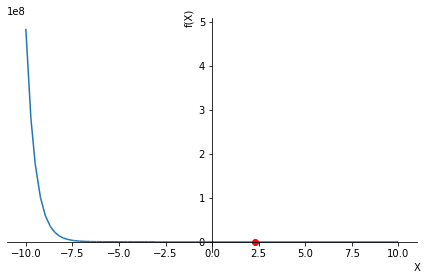

In [24]:
parabola_method('-3*X*sin(0.75*X)+exp(-2*X)', limits='[0, 2*pi]')

In [25]:
def F(x):
    return -3*x*sin(0.75*x)+exp(-2*x)
BrantMethod(F, limits=[0, 2*np.pi])

(2.70647558205328, -7.27435797007390, 'Достигнута заданная точность')

In [26]:
bfgs(f, f1, x0=2)

{'point': 2.706475565719076,
 'value_func': -7.2743579700739005,
 'report': 1,
 'interim_results_dataset': None}